# Módulo 2: Implementación de un modelo de deep learning

In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory 
from tensorflow.keras.applications.vgg19 import VGG19
from keras import layers


In [2]:
# Cargar los datos
train_datagen = ImageDataGenerator(
    rescale=1. / 255,rotation_range=10, fill_mode='nearest',
    featurewise_center=True,
    featurewise_std_normalization=True,
    vertical_flip= True,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range = (0.4,0.6),
    horizontal_flip=True,validation_split=0.3)

In [3]:
train = train_datagen.flow_from_directory(
    './data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='training'
  )

Found 3942 images belonging to 4 classes.


In [4]:
test = train_datagen.flow_from_directory(
     './data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='validation'
)

Found 1689 images belonging to 4 classes.


Found 5631 files belonging to 4 classes.


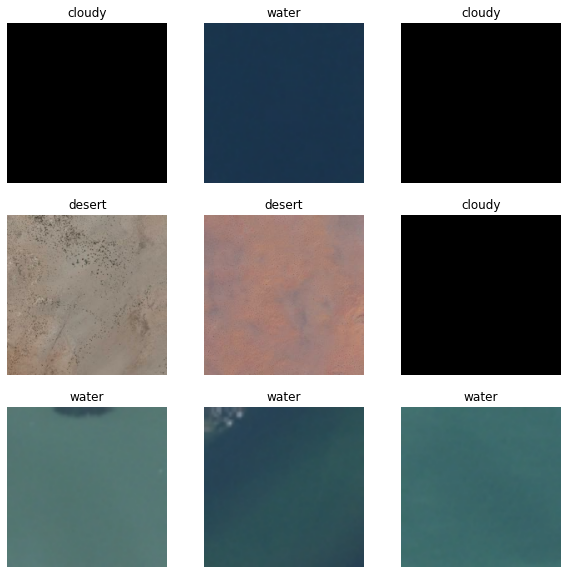

In [5]:
train = image_dataset_from_directory('./data',
                                    shuffle=True,
                                    batch_size=32,image_size=(224,224))
class_name =  train.class_names
plt.figure(figsize = (10,10))
for image , label in train.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

## Modelo 1

In [6]:
# Modelo VGG19
conv_base =  VGG19(include_top=True , weights='imagenet')
for models in conv_base.layers:
  models.trainable= False

In [7]:
vgg_model = keras.Model(inputs=conv_base.input,
                        outputs=conv_base.layers[-2].output)
model = keras.Sequential()
for layer in vgg_model.layers:
  model.add(layer)

model.add(layers.Dense(4, activation='softmax'))

In [8]:
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [9]:
FIT =model.fit(train,
    validation_data = test, 
    callbacks = [early],
    epochs = 20)

Epoch 1/20
 51/176 [=======>......................] - ETA: 5:50 - loss: 0.1154 - accuracy: 0.9608

In [ ]:
model.evaluate(test)